# PLANT   DISEASE    CLASSIFICATION

**Dataset link :** https://www.kaggle.com/vipoooool/new-plant-diseases-dataset

Loading required libraries

In [1]:
import keras
import tensorflow
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Convolution2D
from  tensorflow.keras.layers import MaxPooling2D
from  tensorflow.keras.layers import Flatten
from  tensorflow.keras.layers import Dense              
from  tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Using TensorFlow backend.


In [2]:
train_dir = 'F:/PROJECTS _AI/END TO END/TEnsorFlowJS/Plant Diseases detection/Dataset/train'
valid_dir = 'F:/PROJECTS _AI/END TO END/TEnsorFlowJS/Plant Diseases detection/Dataset/valid'
test_dir = 'F:/PROJECTS _AI/END TO END/TEnsorFlowJS/Plant Diseases detection/Dataset/test'

Total Training images : 52723 images belonging to 38 classes
<br>
Total Test images : 17572 images belonging to 38 classes
<br>
Total Validation images : 17572 images belonging to 38 classes

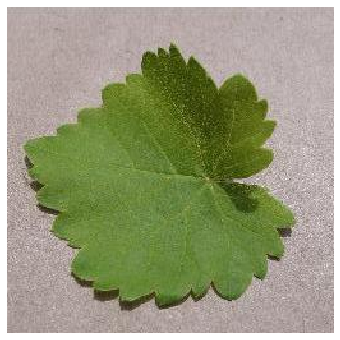

In [4]:
# printing few training images with corresponding label
import numpy as np
import matplotlib.image as mpimg

path = 'F:/PROJECTS _AI/END TO END/TEnsorFlowJS/Plant Diseases detection/Dataset/train/Grape___healthy/3c75e76c-2e1f-478f-aadc-f3decb68c9b0___Mt.N.V_HL 6108_90deg.jpg'
fig = plt.figure(figsize=(6, 6))

img = mpimg.imread(path)
plt.imshow(img, interpolation='nearest')
plt.axis('off')
  
plt.show()

**Grape___healthy**

In [5]:
#image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,         #normalizing each pixels of an image
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )

valid_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 32

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),   # input shape of model
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


Found 52723 images belonging to 38 classes.


In [7]:
valid_set = valid_datagen.flow_from_directory(valid_dir,
                                            target_size=(224, 224),    # input shape of model
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 17572 images belonging to 38 classes.


Number of training labels and their names

In [8]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

I used VGG16 model to create plant disease classifier

In [9]:
model = VGG16()

In [10]:
print("Number Of layers : {}".format(len(model.layers)))

Number Of layers : 23


In [11]:
# model architecture
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# taking output of the 19th layer and adding dense layers on the top of it
x = model.get_layer('block5_pool').output

x = Flatten()(x)
x = Dense(units = 512, activation = 'relu')(x)
x = Dense(units = 512, activation = 'relu')(x)

x = Dense(units = 38, activation = 'softmax')(x)

In [13]:
#creating new model
new_model = tensorflow.keras.Model(inputs=model.input, outputs=x)

#new model architecture
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Plant Disease Classification is computationally expensive problem so I had earlier trained this model on 13 epochs 
which took around 13hrs of training. I loaded the same model weights here and we will further train this model for more 5 epochs to get even more accurate model. 
<br>



In [15]:
#loading weights
new_model.load_weights('C:/Users/Dhiraj Jha/Downloads/Plant Disease Classification/Model weights/Initial_weights.h5')

I had earlier trained this model from 16th layer upto top layer but now I will train 14th and 15th layer, because those layers were not trained .Due to changes in the weights of these layers(14th and 15th layer) model will effect later layers little bit.

In [14]:
# freezing all the layers of this model
for layer in new_model.layers[:]:
    layer.trainable = False
    
# unfreezing only 14th and 15th layer
for layer in new_model.layers[14:16]:
    layer.trainable = True

In [15]:
#new model final architecture
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# Compiling the Model

new_model.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#defining callback

class myCallBack(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.94:
            print("training_completed")
            self.model.stop_training = True

checkpoint = myCallBack() 

In [ ]:
callbacks_list = [checkpoint]

#fitting images to CNN
history = new_model.fit_generator(training_set,
                                  steps_per_epoch = training_set.samples // batch_size,
                                  validation_data = valid_set, 
                                  validation_steps = valid_set.samples // batch_size,
                                  epochs=5,
                                  callbacks = callbacks_list
                                  )

Training Accuracy : 0.9313  and validation accuracy : 0.9386 after 5 epochs

In [18]:
# saving model weights and it's architecture
new_model.save('C:/Users/Dhiraj Jha/Downloads/final_weights.h5')

In [ ]:

sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

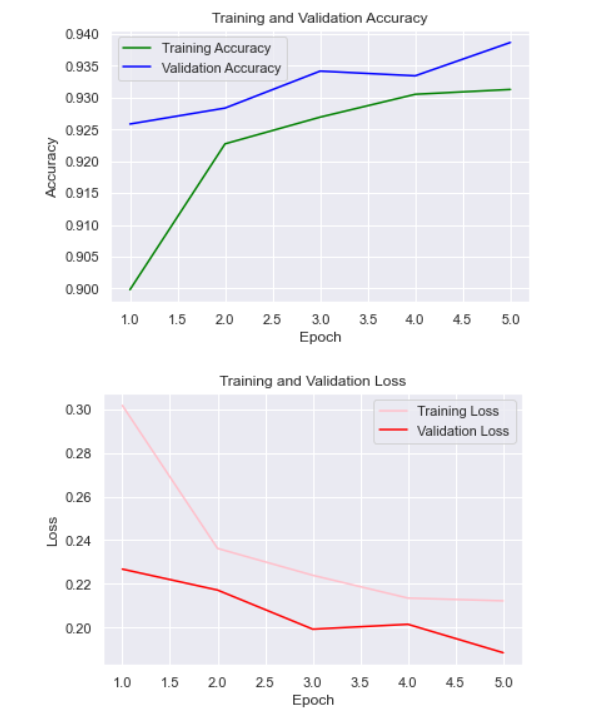

Accuracy of this model can be improved by training on more epochs but it is not feasable to train such model on laptop, because it is computationally expensive.

In [19]:
# testing model accuracy on the test dataset

#normalizing pixels of an image
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),        
                                            class_mode='categorical')

Found 17572 images belonging to 38 classes.


In [ ]:
test_hist = new_model.evaluate_generator(test_set)

In [27]:
new_model.metrics_names

['loss', 'accuracy']

In [ ]:
#accuracy on the test set
print("Test set accuracy : {}".format(test_hist[1]))

Test set accuracy : 0.93387204

This model achieved an accuracy above 93% on the test set

In [24]:
#Testing on one of the sample image from the test set
path = 'F:/PROJECTS _AI/END TO END/TEnsorFlowJS/Plant Diseases detection/Dataset/test/Peach___healthy/0ad0e70a-fa1a-4ec4-885e-2bbb3b57ab93___Rutg._HL 3672_90deg.jpg'

img = cv2.imread(path)       
img = cv2.resize(img,(224,224))       #VGG model accepts 224 * 224 pixels image
img = np.reshape(img,[1,224,224,3])   #converting into tensor

classes = new_model.predict(img)      # predicting output

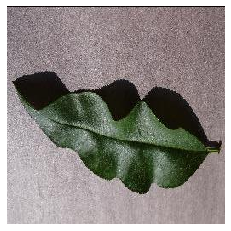

In [22]:
import matplotlib.image as mpimg

img = mpimg.imread(path)
plt.imshow(img, interpolation='nearest')
plt.axis('off')
  
plt.show()

In [ ]:
print("Predicting Classification Output : {}".format(classes))

Predicting Classification Output : Peach___healthy

# Deploying model using TensorFlowJS

**complete description regarding model deployment is given here
https://cppsecrets.com/users/10126100104105114971061121141111061019964103109971051084699111109/-MNIST-HANDWRITTEN-DIGIT-CLASSIFICATION-end-to-end-project-using-TensorFlowJS.php**

In [21]:
# importing libraries
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('C:/Users/Dhiraj Jha/Downloads/final_weights.h5')

In [ ]:
# output directory

path = 'C:/Users/Dhiraj Jha/Downloads/TFJS_model'
tfjs.converters.save_keras_model(model, path)

**HTML and Javascript code**

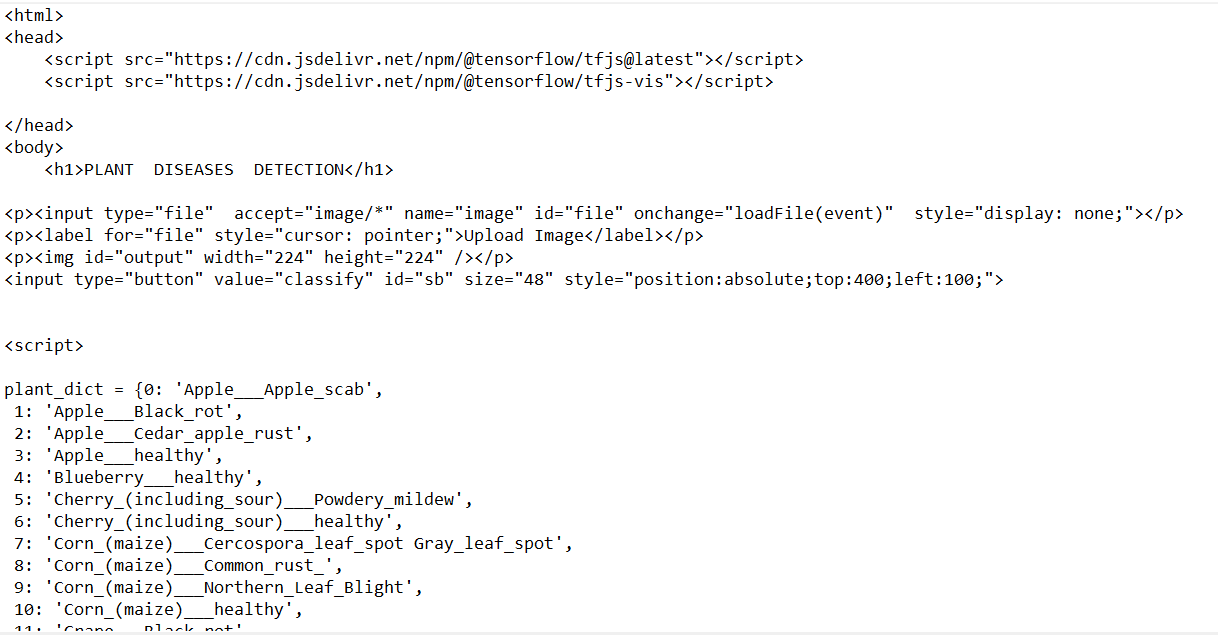


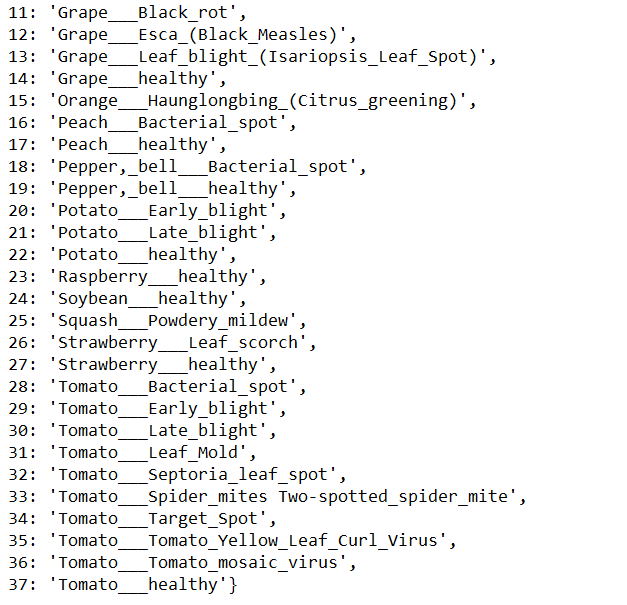

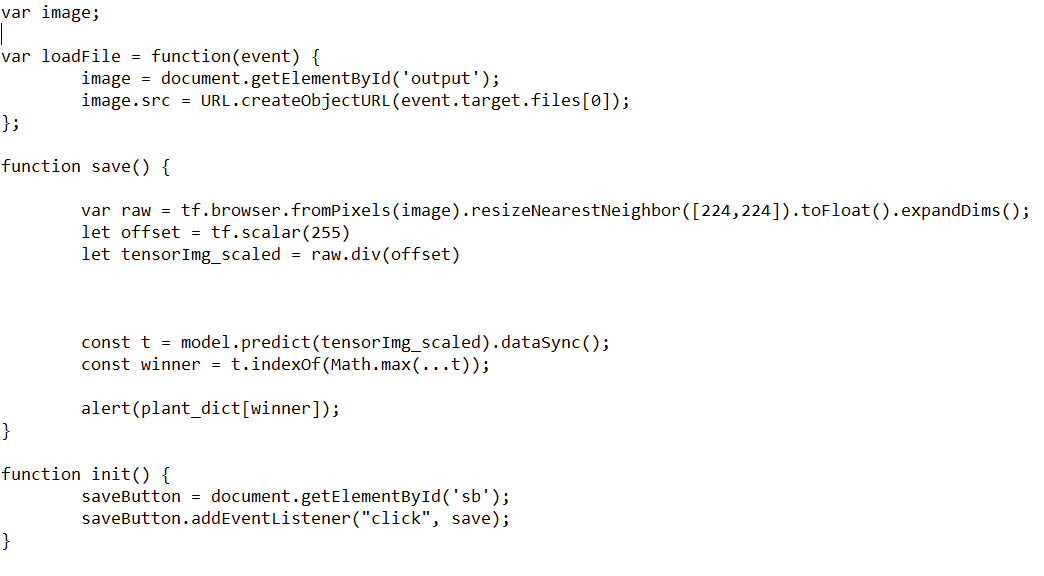

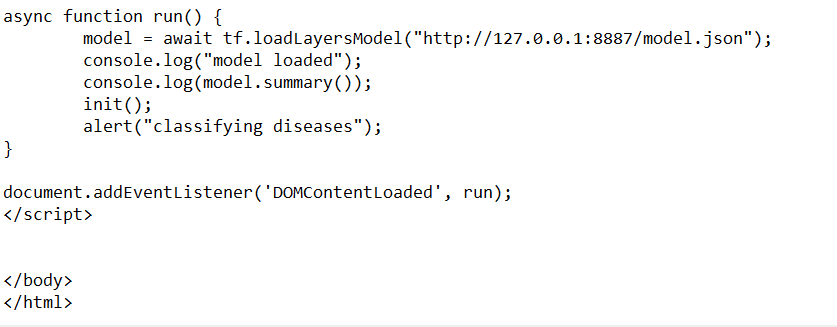

**complete working project**

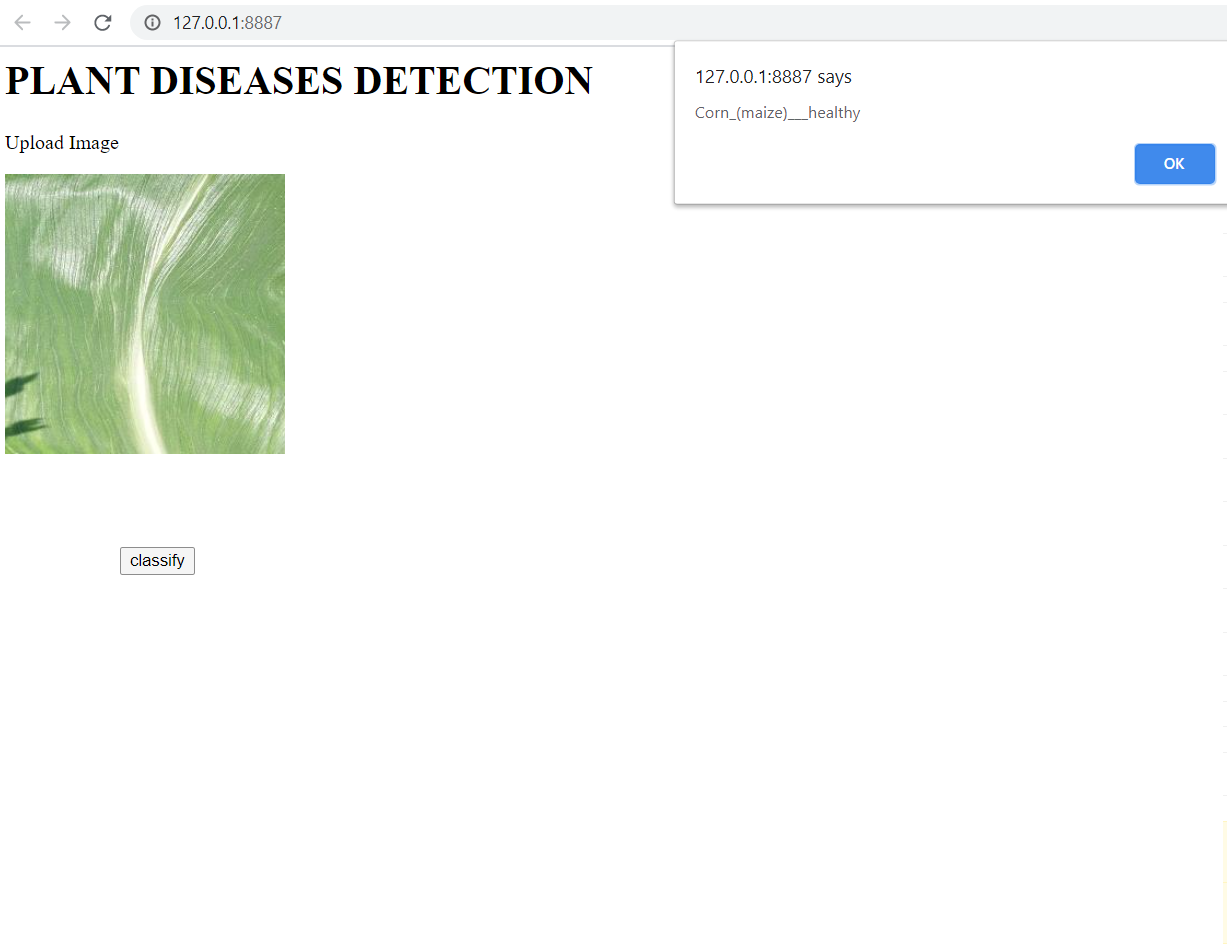